## Лабораторна робота 1 
**Виконала студентка Верзун Поліна км-82**

**Завдання 1**

Згенерувати послідовність з n=1000000 псевдовипадкових чисел, що рівномірно розподілені на інтервалі
(0,1) (використати вбудований генератор псевдовипадкових чисел). Побудувати графік.

Бібліотека numpy.random містить кілька додаткових розподілів ймовірностей, які зазвичай використовуються в наукових дослідженнях, а також кілька зручних функцій для генерації масивів випадкових даних. Бібліотека random.random трохи легша.

В іншому випадку обидві бібліотеки використовують Вихрь Мерсенна для створення своїх випадкових чисел, і обидва вони повністю детерміновані (З цієї причини ні numpy.random, ні random.random не підходять для серйозних криптографічних застосувань)

In [5]:
import numpy.random as npr
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi, gamma
%matplotlib inline

In [6]:
sample = npr.uniform(1,0,1000000)

1.1 Оцінити математичне сподівання та дисперсію отриманої послідовності.

In [7]:
mean = np.mean(sample)
variance = np.var(sample)
print(f"Mean: {mean} ")
print("Variance: {} ".format(variance))

Mean: 0.5000683468907806 
Variance: 0.08328378220237706 


Вибіркове середнє виявилось близьким до теоретичного (0.5), а вибіркова дисперсія -- до теоретичної (1/12 = 0.8333).

1.2 Побудувати і вивести частотну таблицю на екран.

In [8]:
print('Інтервал | К-сть чисел | Відносна частота')
total_quantity = 0
for i in range(10):
    quantity = ((i*0.1 <= sample) & (sample < (i+1)*0.1)).sum() 
    total_quantity += quantity
    print("[{:.1f}; {:.1f}) | {:<11d} | {}".format(i*0.1, (i+1)*0.1, quantity, quantity/1000000))
print(f"Всього чисел: {total_quantity}")

Інтервал | К-сть чисел | Відносна частота
[0.0; 0.1) | 99461       | 0.099461
[0.1; 0.2) | 100098      | 0.100098
[0.2; 0.3) | 100212      | 0.100212
[0.3; 0.4) | 100288      | 0.100288
[0.4; 0.5) | 100070      | 0.10007
[0.5; 0.6) | 100301      | 0.100301
[0.6; 0.7) | 99358       | 0.099358
[0.7; 0.8) | 99763       | 0.099763
[0.8; 0.9) | 100607      | 0.100607
[0.9; 1.0) | 99842       | 0.099842
Всього чисел: 1000000


1.3 Перевірити гіпотезу про закон розподілу, побудувати гістограму.

Для того щоб перевірити гіпотезу про закон розподілу, треба побудувати гістограму та провести графік щільності теоретичного закону розподілу
у випадку рівномірного розподілу -- пряму y = 1, x ∈ [0; 1). 

Якщо гістограма повторює контур щільності розподілу, можемо вважати, що нема підстав відкидати цю гіпотезу. 

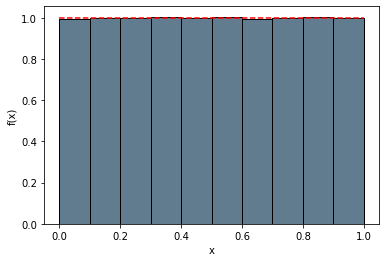

In [9]:
plt.hist(sample, bins=10, density=True, edgecolor = "black", color='#607c8e') 
plt.plot([0, 1], [1, 1], "r--") 
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

Даний графік свідчить, що випадкова величина розподілена за рівномірним законом.


1.4 Побудувати гістограму розподілу випадкової величини η = max(ξ), де ξ - рівномірно розподілена на
(0,1) випадкова величина:



а) змоделювати n = 1000000 значень величини ξ, знайти максимальне значення η 1 = max(ξ);



б) процедуру а) повторити m = 1000 разів;




в) для випадкової величини η = η i , i = 1..m побудувати гістограму.

Середнє значення: 0.9999990278310915


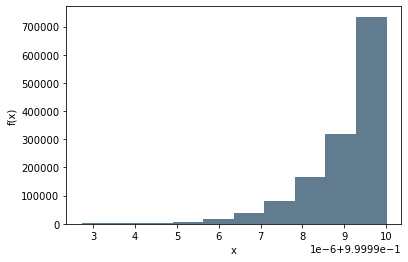

In [10]:
eta_sample = [max(npr.sample(1000000)) for i in range(1000)]
plt.hist(eta_sample, edgecolor = "#607c8e", color='#607c8e', density=True)
print("Середнє значення:", np.mean(eta_sample))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

начення щільності розподілу вийшли дуже великими (до 700000), але це очікувано, адже ширина гістограми доволі мала (значення η
зосереджені дуже близько до 1), а її площа дорівнює одиниці.

**Завдання 2**


Змоделювати дискретну випадкову величину, задану таблицею, побудувати графік.



Варіант 2

xi 1 3 7 10 15 18 23


pi 0.1 0.05 0.02 0.05 0.25 0.33 0.2

In [11]:
values = np.array([1, 3, 7, 10, 15, 18, 23,])
probs = np.array([0.1, 0.05, 0.02, 0.05, 0.25, 0.33, 0.2,])
n = 100000
sample = np.random.choice(values, size = n, replace=True, p=probs)

2.1 Оцінити математичне сподівання та дисперсію отриманої дискретної випадкової величини.

In [12]:
mean = np.mean(sample)
variance = np.var(sample)
print(f"Mean: {mean} ")
print("Variance: {} ".format(variance))

Mean: 15.20281 
Variance: 45.03565810389999 


In [13]:
print('Значення ВВ | К-сть чисел | Відносна частота')
total_quantity = 0
density_array = []
for i in values:
    quantity = np.count_nonzero(sample == i)
    density_array.append(quantity/n)
    total_quantity += quantity
    print("{:<11d} | {:<11d} | {}".format(i, quantity, quantity/n))
print(f"Всього значень: {total_quantity}")

Значення ВВ | К-сть чисел | Відносна частота
1           | 9898        | 0.09898
3           | 5042        | 0.05042
7           | 1989        | 0.01989
10          | 5012        | 0.05012
15          | 24951       | 0.24951
18          | 32907       | 0.32907
23          | 20201       | 0.20201
Всього значень: 100000


2.3 Перевірити гіпотезу про закон розподілу, побудувати гістограму.
Побудуємо стовпчикову діаграму, в якій одному стовпчику відповідатиме одне значення випадкової величини (на відміну від попередніх
гістограм, де одному стовпчику відповідав один інтервал чисел).

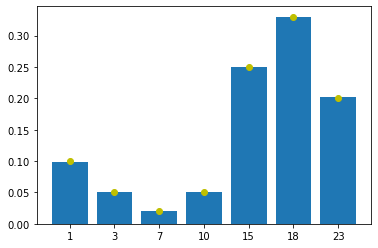

In [14]:
plt.bar(x=range(len(values)), height=density_array)
plt.xticks(range(len(values)), values)
plt.plot(range(len(values)), probs, "yo")
plt.show()

Жовтими точками позначено теоретичні імовірності, з якими трапляється кожне значення випадкової величини. Як можна бачити, стовпці
діаграми (емпірична імовірність) та жовті точки (теоретична імовірність) знаходяться на однаковій висоті, що не суперечить гіпотезі про закон
розподілу цієї випадкової величини.

**Завдання 3**


Моделювання гауссівського розподілу за алгоритмами:

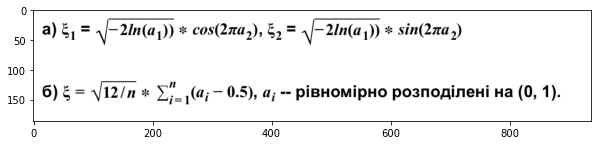

In [15]:
import cv2
plt.figure(figsize=(10,20))
im = cv2.imread('Screenshot from 2020-10-17 13-35-03.png')
plt.imshow(im)
plt.show()

Перевірити закон розподілу, в алгоритмі б) перевірити закон розподілу для різних n (n=12, n=48,
n=3).
Нехай a 1 та a 2 -- масиви зі 100000 випадковими числами кожен. Змоделюємо випадкові величини ξ 1 та ξ 2 :

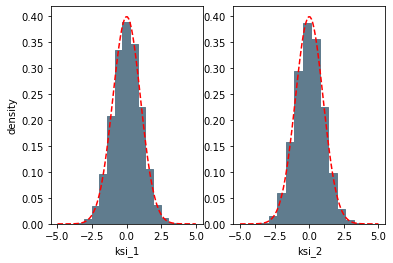

In [16]:
m = 100000
a_1, a_2 = np.random.sample(m), np.random.sample(m)
xi_1 = np.sqrt(-2*np.log(a_1))*np.cos(2*pi*a_2)
xi_2 = np.sqrt(-2*np.log(a_1))*np.sin(2*pi*a_2)
plt.figure()
plt.subplot(121)
plt.hist(xi_1, density=True, bins=15, edgecolor = "#607c8e", color='#607c8e')
x = np.linspace(-5, 5, 100)
y_norm = 1/sqrt(2*pi) * np.exp(-x**2/2)
plt.plot(x, y_norm, "r--")
plt.xlabel("ksi_1")
plt.ylabel("density")
plt.subplot(122)
plt.hist(xi_2, density=True, bins=15, edgecolor = "#607c8e", color='#607c8e')
plt.plot(x, y_norm, "r--")
plt.xlabel("ksi_2")
plt.show()

Як бачимо, змодельовані випадкові величини дійсно задовольняють гіпотезу про нормальний розподіл. Перейдемо до моделювання випадкової
величини ξ для різних n -- матимемо три масиви значень цієї випадкової величини: для n = 3, 12, 48.

In [17]:
n = 3
xi_n_3 = np.array([sqrt(12/n) * sum([np.random.sample() - 0.5 for i in range(n)]) for j in range(m)])

n = 12
xi_n_12 = np.array([sqrt(12/n) * sum([np.random.sample() - 0.5 for i in range(n)]) for j in range(m)])

n = 48
xi_n_48 = np.array([sqrt(12/n) * sum([np.random.sample() - 0.5 for i in range(n)]) for j in range(m)])

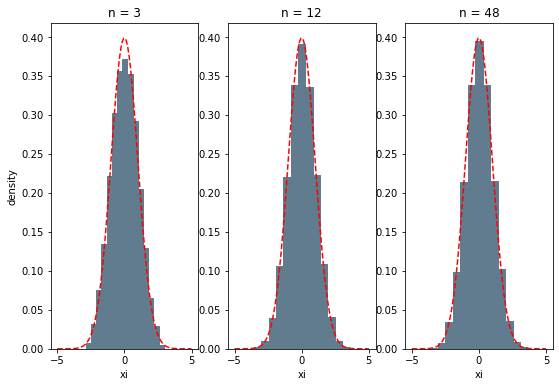

In [18]:
plt.figure(figsize=(9, 6))
# n = 3
plt.subplot(131)
plt.hist(xi_n_3, density=True, bins=15, edgecolor = "#607c8e", color='#607c8e')
plt.plot(x, y_norm, "r--")
plt.title("n = 3")
plt.xlabel("xi")
plt.ylabel("density")
# n = 12
plt.subplot(132)
plt.hist(xi_n_12, density=True, bins=15, edgecolor = "#607c8e", color='#607c8e')
plt.plot(x, y_norm, "r--")
plt.title("n = 12")
plt.xlabel("xi")
# n = 48
plt.subplot(133)
plt.hist(xi_n_48, density=True, bins=15, edgecolor = "#607c8e", color='#607c8e')
plt.plot(x, y_norm, "r--")
plt.title("n = 48")
plt.xlabel("xi")
plt.show()

При n = 3 випадкова величина вже приблизно розподілена за стандартним нормальним розподілом, але гістограма трохи не дістає до графіка
щільності розподілу. При n = 12 розподіл наближається до стандартного нормального найбільше.

**Завдання 4**


Змоделювати неперервні випадкові величини, що мають закони розподілу Вейбулла, Релея,
логнормальний, Коші, Накагамі. Побудувати графіки.


4.1 Оцінити математичне сподівання та дисперсію отриманих випадкових величин.


4.2 Побудувати частотну таблицю для кожної реалізації.


4.3 Перевірити гіпотезу про закон розподілу, побудувати гістограму.

**Розподіл Вейбулла**: нехай lambda = 1, k = 1.5

In [19]:
m = 100000 # кількість значень кожної випадкової величини
k, lambd = 1.5, 1
weibull = np.random.weibull(k, m)
weibull_mean, weibull_variance = np.mean(weibull), np.var(weibull)
print(f"Середнє: {weibull_mean}\nДисперсія: {weibull_variance} ")

Середнє: 0.9042291377564169
Дисперсія: 0.37611770137415684 


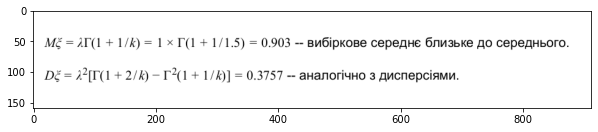

In [20]:
im = cv2.imread('Screenshot from 2020-10-17 13-49-36.png')
plt.figure(figsize=(10,20))

plt.imshow(im)
plt.show()

Інтервал| К-сть чисел | Відносна частота
[0.00; 0.25) | 11731       | 0.11731
[0.25; 0.50) | 17967       | 0.17967
[0.50; 0.75) | 17988       | 0.17988
[0.75; 1.00) | 15392       | 0.15392
[1.00; 1.25) | 12094       | 0.12094
[1.25; 1.50) | 8840        | 0.0884
[1.50; 1.75) | 6114        | 0.06114
[1.75; 2.00) | 3944        | 0.03944
[2.00; 2.25) | 2495        | 0.02495
[2.25; 2.50) | 1487        | 0.01487
[2.50; 2.75) | 866         | 0.00866
[2.75; 3.00) | 532         | 0.00532
[3.00; +Inf) | 550         | 0.0055
Всього чисел: 100000



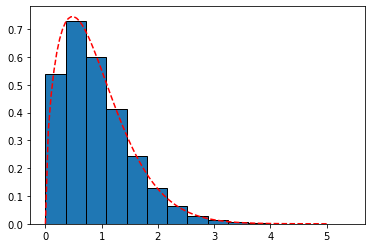

In [21]:
print('Інтервал| К-сть чисел | Відносна частота')

total_quantity = 0
for i in range(12):
    
    quantity = ((i*0.25 <= weibull) & (weibull < (i+1)*0.25)).sum()
    total_quantity += quantity
    
    print("[{:.2f}; {:.2f}) | {:<11d} | {}".format(i*0.25, (i+1)*0.25, quantity, quantity/m))
    
quantity = (3 <= weibull).sum()
total_quantity += quantity

print("[3.00; +Inf) | {:<11d} | {}".format(quantity, quantity/m))
print(f"Всього чисел: {total_quantity}\n")

plt.hist(weibull, bins=15, density=True, edgecolor="black")

# також проведемо графік щільності розподілу
x = np.linspace(0, 5, 100)
y_weibull = k/lambd * np.power(x/lambd, k-1) * np.exp(-np.power(x/lambd, k))

plt.plot(x, y_weibull, "r--")
plt.show()

Форма гістограми узгоджується з формою графіка щільності імовірності -- гіпотеза про закон розподілу не відкидається.


Розподіл Релея: нехай sigma = 1.

In [22]:
sigma = 1
rayleigh = np.random.rayleigh(sigma, m)
rayleigh_mean, rayleigh_variance = np.mean(rayleigh), np.var(rayleigh)
print(f"Середнє: {rayleigh_mean}\nДисперсія: {rayleigh_variance} ")

Середнє: 1.2513746207352499
Дисперсія: 0.429666515952889 


Mξ = σ √ π / 2 = 1.2533 -- результат близький до емпіричного.
Dξ = (2 − π / 2)σ 2 = 0.4292 -- аналогічно з дисперсіями.

Інтервал| К-сть чисел | Відносна частота
[0.00; 0.33) | 5359        | 0.05359
[0.33; 0.66) | 14498       | 0.14498
[0.66; 0.99) | 18996       | 0.18996
[0.99; 1.32) | 19332       | 0.19332
[1.32; 1.65) | 16308       | 0.16308
[1.65; 1.98) | 11580       | 0.1158
[1.98; 2.31) | 6978        | 0.06978
[2.31; 2.64) | 3859        | 0.03859
[2.64; 2.97) | 1869        | 0.01869
[2.97; 3.30) | 817         | 0.00817
[3.30; 3.63) | 270         | 0.0027
[3.63; 3.96) | 94          | 0.00094
[3.96; +Inf) | 40          | 0.0004
Всього чисел: 100000



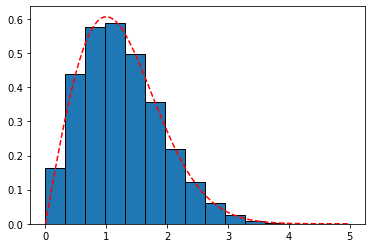

In [23]:
print('Інтервал| К-сть чисел | Відносна частота')
total_quantity = 0
for i in range(12):
    quantity = ((i*0.33 <= rayleigh) & (rayleigh < (i+1)*0.33)).sum()
    total_quantity += quantity
    print("[{:.2f}; {:.2f}) | {:<11d} | {}".format(i*0.33, (i+1)*0.33, quantity, quantity/m))
quantity = (0.33*12 <= rayleigh).sum()
total_quantity += quantity
print("[3.96; +Inf) | {:<11d} | {}".format(quantity, quantity/m))
print(f"Всього чисел: {total_quantity}\n")
plt.hist(rayleigh, bins=15, density=True, edgecolor="black")
x = np.linspace(0, 5, 100)
y_rayleigh = x / sigma**2 * np.exp(-np.square(x) / (2*sigma**2))
plt.plot(x, y_rayleigh, "r--")
plt.show()

Гіпотеза про закон розподілу не відкидається.



Логнормальний розподіл: нехай mu = 0, sigma = 1.

In [24]:
mu, sigma = 0, 1
lognormal = np.random.lognormal(mu, sigma, m)
lognorm_mean, lognorm_variance = np.mean(lognormal), np.var(lognormal)
print(f"Середнє: {lognorm_mean}\nДисперсія: {lognorm_variance} ")

Середнє: 1.650513245872403
Дисперсія: 4.588528445683613 


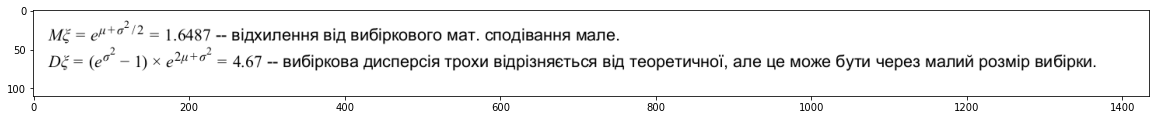

In [27]:
im = cv2.imread('Screenshot from 2020-10-18 19-53-31.png')
plt.figure(figsize=(20,20))

plt.imshow(im)
plt.show()

Інтервал | К-сть чисел | Відносна частота
[0.00; 0.25) | 8392        | 0.08392
[0.25; 0.50) | 15961       | 0.15961
[0.50; 0.75) | 14345       | 0.14345
[0.75; 1.00) | 11356       | 0.11356
[1.00; 1.25) | 8807        | 0.08807
[1.25; 1.50) | 6768        | 0.06768
[1.50; 1.75) | 5470        | 0.0547
[1.75; 2.00) | 4366        | 0.04366
[2.00; 2.25) | 3618        | 0.03618
[2.25; 2.50) | 2878        | 0.02878
[2.50; 2.75) | 2325        | 0.02325
[2.75; 3.00) | 1974        | 0.01974
[3.00; +Inf) | 13740       | 0.1374
Всього чисел: 100000



/home/pollymorphism/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/pollymorphism/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/home/pollymorphism/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]


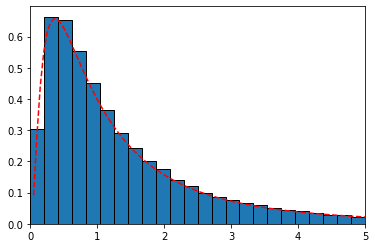

In [29]:
print('Інтервал | К-сть чисел | Відносна частота')
total_quantity = 0
for i in range(12):
    quantity = ((i*0.25 <= lognormal) & (lognormal < (i+1)*0.25)).sum()
    total_quantity += quantity
    print("[{:.2f}; {:.2f}) | {:<11d} | {}".format(i*0.25, (i+1)*0.25, quantity, quantity/m))
quantity = (3 <= lognormal).sum()
total_quantity += quantity
print("[3.00; +Inf) | {:<11d} | {}".format(quantity, quantity/m))
print(f"Всього чисел: {total_quantity}\n")
plt.hist(lognormal, bins=np.linspace(0, 5, 25), density=True, edgecolor="black")
x = np.linspace(0, 5, 100)
y_lognorm = 1/(x * sigma * sqrt(2*pi)) * np.exp(-np.square(np.log(x)-mu) / (2*sigma**2))
plt.plot(x, y_lognorm, "r--")
plt.xlim((0, 5))
plt.show()

Гіпотеза про закон розподілу не відкидається.


Розподіл Коші: нехай lambda = 1, x0 = 0.

In [30]:
x0, lambd = 0, 1
cauchy = np.random.standard_cauchy(m)
cauchy_mean, cauchy_variance = np.mean(cauchy), np.var(cauchy)
print(f"Середнє: {cauchy_mean}\nДисперсія: {cauchy_variance} ")

Середнє: 0.6025173358233022
Дисперсія: 59894.3698606127 


Математичного сподівання цієї випадкової величини не існує, тому вибіркове середнє може бути будь-яким, а теоретична дисперсія дорівнює нескінченності. І справді -- вибіркова дисперсія доволі велика.

Інтервал | К-сть чисел | Відносна частота
(-Inf ; -5.00) | 6432        | 0.06432
[-5.00; -4.00) | 1538        | 0.01538
[-4.00; -3.00) | 2485        | 0.02485
[-3.00; -2.00) | 4508        | 0.04508
[-2.00; -1.00) | 10305       | 0.10305
[-1.00;  0.00) | 24903       | 0.24903
[ 0.00;  1.00) | 24947       | 0.24947
[ 1.00;  2.00) | 10277       | 0.10277
[ 2.00;  3.00) | 4504        | 0.04504
[ 3.00;  4.00) | 2421        | 0.02421
[ 4.00;  5.00) | 1530        | 0.0153
[ 5.00; +Inf) | 6150        | 0.0615
Всього чисел: 100000



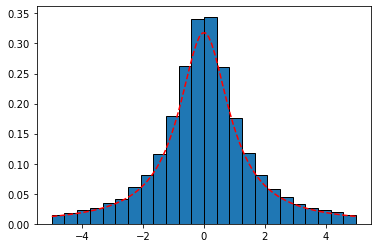

In [31]:
print('Інтервал | К-сть чисел | Відносна частота')
total_quantity = 0
quantity = (-5 > cauchy).sum()
total_quantity += quantity
print("(-Inf ; -5.00) | {:<11d} | {}".format(quantity, quantity/m))
for i in range(10):
    quantity = ((i - 5 <= cauchy) & (cauchy < (i+1) - 5)).sum()
    total_quantity += quantity
    print("[{: .2f}; {: .2f}) | {:<11d} | {}".format(i - 5, (i+1) - 5, quantity, quantity/m))
quantity = (5 <= cauchy).sum()
total_quantity += quantity
print("[ 5.00; +Inf) | {:<11d} | {}".format(quantity, quantity/m))
print(f"Всього чисел: {total_quantity}\n")
plt.hist(cauchy, bins=np.linspace(-5, 5, 25), density=True, edgecolor="black")
x = np.linspace(-5, 5, 100)
y_cauchy = 1/pi * (lambd / ((x-x0)**2 + lambd**2))
plt.plot(x, y_cauchy, "r--")
plt.show()

Гістограма трохи виходить за межі графіка щільності імовірності, але загалом форма гістограми схожа на форму графіка щільності імовірності.
Для розподілу Накагамі відповідної функції в модулі numpy.random нема, тож необхідно змоделювати цю випадкову величину вручну.
Скористаємось наступним фактом: якщо 

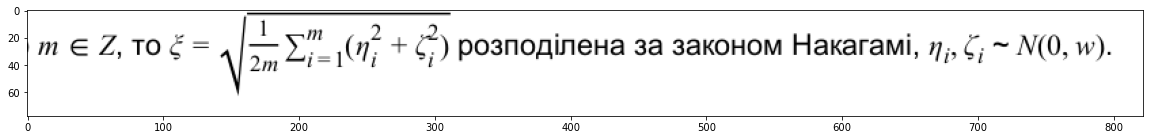

In [33]:
im = cv2.imread('Screenshot from 2020-10-18 20-07-08.png')
plt.figure(figsize=(20,20))

plt.imshow(im)
plt.show()

Нехай n = 2, w = 2 (оскільки буква m вже залучена в коді, позначатимемо параметр m літерою n).

In [35]:
n = w = 2
nakagami = np.sqrt(1 / (2*n) * sum([np.square(np.random.normal(0, w**0.5, m)) + np.square(np.random.normal(0, w**0.5, m)) for i in range(n)] ))
nakagami_mean, nakagami_variance = np.mean(nakagami), np.var(nakagami)
print(f"Середнє: {nakagami_mean}\nДисперсія: {nakagami_variance} ")

Середнє: 1.3278797939201028
Дисперсія: 0.23464904604492268 


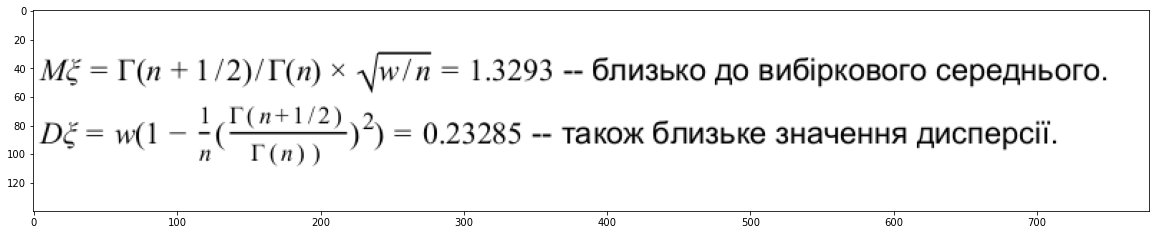

In [37]:
im = cv2.imread('Screenshot from 2020-10-18 20-10-11.png')
plt.figure(figsize=(20,20))

plt.imshow(im)
plt.show()

Інтервал | К-сть чисел | Відносна частота
[0.00; 0.25) | 194         | 0.00194
[0.25; 0.50) | 2506        | 0.02506
[0.50; 0.75) | 8283        | 0.08283
[0.75; 1.00) | 15716       | 0.15716
[1.00; 1.25) | 19861       | 0.19861
[1.25; 1.50) | 19295       | 0.19295
[1.50; 1.75) | 15052       | 0.15052
[1.75; 2.00) | 9750        | 0.0975
[2.00; 2.25) | 5459        | 0.05459
[2.25; 2.50) | 2507        | 0.02507
[2.50; 2.75) | 925         | 0.00925
[2.75; 3.00) | 317         | 0.00317
[3.00; +Inf) | 135         | 0.00135
Всього чисел: 100000



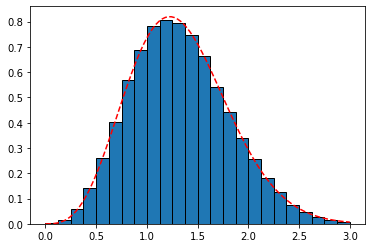

In [36]:
print('Інтервал | К-сть чисел | Відносна частота')
total_quantity = 0
for i in range(12):
    quantity = ((i*0.25 <= nakagami) & (nakagami < (i+1)*0.25)).sum()
    total_quantity += quantity
    print("[{:.2f}; {:.2f}) | {:<11d} | {}".format(i*0.25, (i+1)*0.25, quantity, quantity/m))
quantity = (3 <= nakagami).sum()
total_quantity += quantity
print("[3.00; +Inf) | {:<11d} | {}".format(quantity, quantity/m))
print(f"Всього чисел: {total_quantity}\n")
plt.hist(nakagami, bins=np.linspace(0, 3, 25), density=True, edgecolor="black")
x = np.linspace(0, 3, 100)
y_nakagami = 2*n**n / (gamma(n)*w**n) * x**(2*n-1) * np.exp(-n/w*x**2)
plt.plot(x, y_nakagami, "r--")
plt.show()

Гіпотеза про закон розподілу не відкидається.

**Завдання 5**

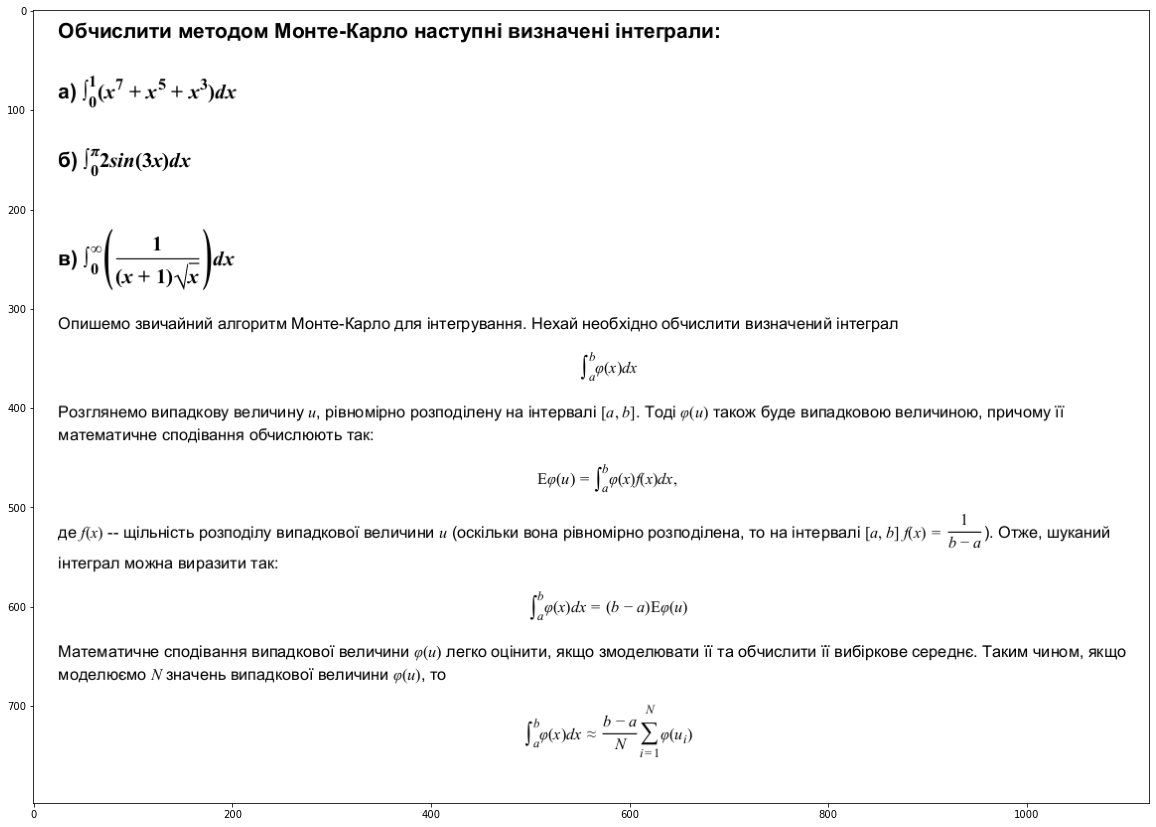

In [38]:
im = cv2.imread('Screenshot from 2020-10-18 20-11-44.png')
plt.figure(figsize=(20,20))

plt.imshow(im)
plt.show()

In [40]:
# перший інтеграл
n = 100000
f1 = lambda x: x**7 + x**5 + x**3
integral_1 = (1-0) / n * sum( [f1(np.random.sample()) for i in range(n)] )
print("(x^7 + x^5 + x^3)dx від 0 до 1 ≈", integral_1)
print("Точне значення -- 13/24 ≈ 0.54166667")
print('')

# другий інтеграл
f2 = lambda x: 2*np.sin(3*x)
integral_2 = (pi - 0) / n * sum( [f2(np.random.uniform(0, pi)) for i in range(n)] )
print("2sin(3x)dx від 0 до pi ≈", integral_2)
print("Точне значення -- 4/3 ≈ 1.3333")
print('')

print('У випадку з третім інтегралом b = ∞ -- оберемо замість нескінченності достатньо велике число (наприклад, 10000). Тоді і значення N відповідно варто взяти більшим.')
# третій інтеграл
n = 10000000
f3 = lambda x: 1/((x+1)*np.sqrt(x))
integral_3 = (10000 - 0) / n * sum( [f3(np.random.uniform(0, 10000)) for i in range(n)] )
print("1/((x+1)*sqrt(x)) від 0 до +Inf ≈", integral_3)
print("Точне значення -- π ≈ 3.14159")

(x^7 + x^5 + x^3)dx від 0 до 1 ≈ 0.5451976590243777
Точне значення -- 13/24 ≈ 0.54166667

2sin(3x)dx від 0 до pi ≈ 1.3398304569567843
Точне значення -- 4/3 ≈ 1.3333

У випадку з третім інтегралом b = ∞ -- оберемо замість нескінченності достатньо велике число (наприклад, 10000). Тоді і значення N відповідно варто взяти більшим.
1/((x+1)*sqrt(x)) від 0 до +Inf ≈ 3.043554450682358
Точне значення -- π ≈ 3.14159


Завдання 6

Моделюємо випадкову величину ξ, отримуємо масив з n чисел. Щоб змоделювати випадкову величину β, необхідно від ξ 1 відняти ξ 0 і порівняти
різницю з нулем; від ξ 2 відняти ξ 1 і порівняти різницю з нулем. Скористаємось тим, що в модулі numpy можливі поелементні дії над масивами.

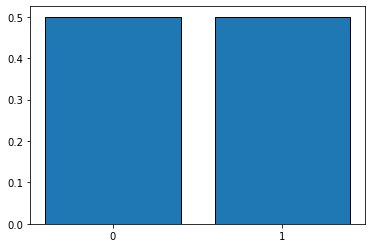

In [41]:
n = 100001
xi = np.random.standard_normal(n)
difference = xi[1:n] - xi[0:n-1]
# якщо порівняти масив difference з нулем, отримаємо масив значень True/False
# їх можна перевести в 1/0, якщо змінити тип даних з bool на int
beta = (difference > 0).astype(int)


plt.bar([0, 1], [np.count_nonzero(beta == 0)/(n-1), np.count_nonzero(beta == 1)/(n-1)], edgecolor="black")
plt.xticks((0, 1))
plt.show()

Бачимо, що β приймає значення 0 і 1 з однаковою імовірністю -- 0.5. Це можна пояснити: якщо ξ i вийшло доволі великим, то ξ i + 1 з великою
імовірністю прийме менше значення, а отже, β i дорівнюватиме 1. Аналогічно якщо ξ i доволі мале, то ξ i + 1 з великою імовірністю прийме більше
значення, а отже, β i дорівнюватиме 0. А оскільки графік щільності розподілу стандартної нормальної випадкової величини симетричний відносно
свого математичного сподівання, дві ситуації вище рівноможливі.



Завдання 7



Побудувати гістограму розподілу випадкової величини η = max(ξ), де ξ ∼ N(0, 1).

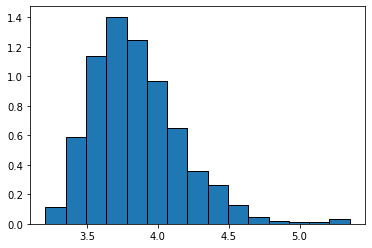

Результат буде варіюватися залежно від того, від скількох значень випадкової величини береться максимум. Якщо це число N буде дуже
великим, то імовірність потрапляння аномально великих значень у вибірку з N чисел буде високою, а отже, максимуми теж будуть більшими --
середнє випадкової величини η також буде збільшуватись. Покажемо це на практиці.


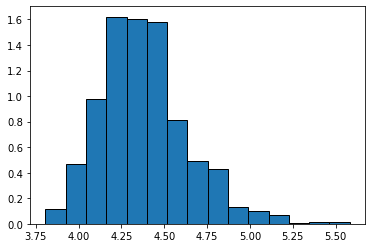

In [42]:
eta = [max(np.random.standard_normal(10000)) for i in range(1000)]
plt.hist(eta, edgecolor = "black", density=True, bins=15)
plt.show()

print('''Результат буде варіюватися залежно від того, від скількох значень випадкової величини береться максимум. Якщо це число N буде дуже
великим, то імовірність потрапляння аномально великих значень у вибірку з N чисел буде високою, а отже, максимуми теж будуть більшими --
середнє випадкової величини η також буде збільшуватись. Покажемо це на практиці.''')

# тепер беремо максимум зі 100000 чисел
eta = [max(np.random.standard_normal(100000)) for i in range(1000)]
plt.hist(eta, edgecolor = "black", density=True, bins=15)
plt.show()

Завдання 8
Задано M кіл (відомі координати центра та радіус). Перевірити, чи мають ці кола спільні точки. Знайти
площу фігури, що утворилась в результаті їх перетину.
Нехай у нас є деяка складна фігура, площу якої необхідно обчислити. Обмежимо дану фігуру деяким прямокутником та "кинемо" в цей
прямокутник N рівномірно розподілених випадкових точок. При великому N ці точки щільно і рівномірно покриють прямокутник та складну фігуру
всередині нього. Очевидно, кількість точок, що влучила в фігуру, залежить від площі самої фігури. А отже, справедливо наступне: відношення
площі фігури до площі прямокутника приблизно дорівнює відношенню кількості точок, що влучили у фігуру, до загальної кількості точок. Тобто
якщо H -- кількість точок, що влучили у фігуру, N -- загальна кількість точок, S -- шукана площа фігури, S r -- площа прямокутника, то:
S ≈ (S r × H)/N

In [55]:
def distance(x1, y1, x2, y2):
    return sqrt((x2-x1)**2 + (y2-y1)**2)

def circles_intersecton(circles, draw = True):
    """Перевіряє, чи мають всі круги хоча б одну спільну точку, обчислює площу їх перетину методом Монте-Карло.
    circles -- задані кола; список кортежів, кожен кортеж містить три елементи: координати центра х, у та радіус.
    draw -- True/False; чи варто малювати фігуру."""
    # обмежуємо всі кола одним спільним прямокутником
    # для кожного кола знаходимо його крайні точки (зліва, справа, згори, знизу), беремо їх мінімум чи максимум
    # circle[0] = координата х центра кола; circle[1] = координата y; circle[2] = радіус кола
    xmin_circle = min(circles, key=lambda circle: circle[0]-circle[2])
    xmin = xmin_circle[0] - xmin_circle[2]
    xmax_circle = max(circles, key=lambda circle: circle[0]+circle[2])
    xmax = xmax_circle[0] + xmax_circle[2]
    ymin_circle = min(circles, key=lambda circle: circle[1]-circle[2])
    ymin = ymin_circle[1] - ymin_circle[2]
    ymax_circle = max(circles, key=lambda circle: circle[1]+circle[2])
    ymax = ymax_circle[1] + ymax_circle[2]
    # кидаємо n точок в прямокутник
    # H -- к-сть точок, що потрапили в перетин кіл
    # S -- площа перетину кіл
    # S_r -- плоша прямокутника
    # H/n ≈ S/S_r --> S = S_r * H / n
    n = 5000
    H = 0
    S_r = (xmax-xmin)*(ymax-ymin)
    # водночас починаємо створювати графічне відображення процесу "кидання" точок
    if draw:
        fig, axes = plt.subplots(figsize=(7, 7))
        plt.xlim(min(xmin, ymin), max(xmax, ymax))
        plt.ylim(min(xmin, ymin), max(xmax, ymax))
        
    for i in range(n):
        # кидаємо випадкову точку
        x_rand, y_rand = np.random.uniform(xmin, xmax), np.random.uniform(ymin, ymax)
        # для кожного кола перевіряємо, чи міститься випадкова точка всередині кола
        # якщо вона всередині кожного кола -- збільшуємо Н на 1
        for x_center, y_center, r in circles:
            if distance(x_center, y_center, x_rand, y_rand) >= r:
                # точка зовні кола; зображаємо точку синьою
                if draw:
                    axes.plot(x_rand, y_rand, "bo", zorder = 1)
                break
            else:
            # точка всередині кола; зображаємо точку зеленою
                if draw:
                    axes.plot(x_rand, y_rand, "go", zorder = 1)
                H += 1
    # намалюємо також наші початкові кола
        
    if draw:
        for x, y, r in circles:
            circle_image = plt.Circle((x, y), r, fill = False, color = "r", linestyle = "--", linewidth = 3)
            circle_image.set_zorder(2)
            axes.add_artist(circle_image)
        plt.grid(zorder = 3, color = "black", linewidth = 2)
        plt.show()
    return {"area": S_r * H / n, "rectangle": (xmin, xmax, ymin, ymax)}

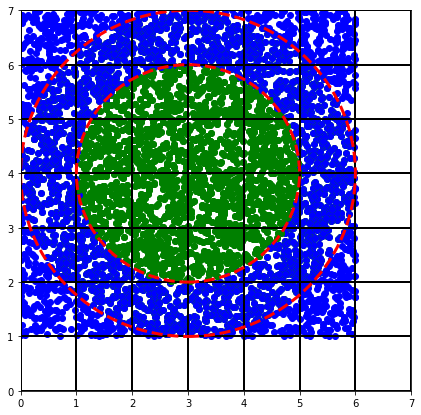

Площа фігури: 12.6432


In [57]:
#два кола з центром у точці (3, 4) та радіусами 2 і 3
circles = ((3, 4, 3), (3, 4, 2))
area, rectangle = circles_intersecton(circles).values()
print("Площа фігури:", area)

Графік зображає область, більшу за вищезгаданий прямокутник, щоб кола не відображались сплющеними.
Точне значення площі -- S = πR 2 = π × 4 = 12.566. Площа, обчислена даним методом, виявилась близькою до точної площі.
Спробуємо тепер складніший випадок -- 4 кола.

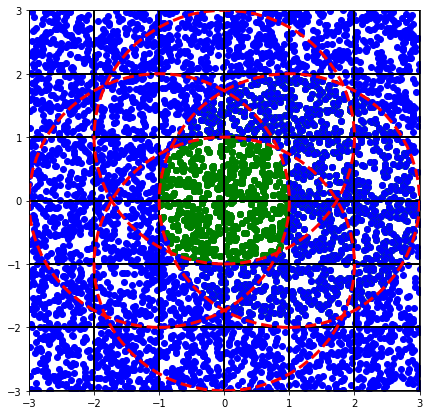

Площа фігури: 3.5568


In [59]:
circles = ((1, 0, 2), (0, 1, 2), (-1, 0, 2), (0, -1, 2))
area, rectangle = circles_intersecton(circles).values()
print("Площа фігури: ", area)

Видно, що зона перетину чотирьох кіл трохи більша за одиничне коло, а отже, точне значення площі трохи більше за 3.14.
Останній випадок -- кола не мають спільних точок перетину


Завдання 9
Задано M сфер (відомі координати центра та радіус). Перевірити, чи мають ці сфери спільні точки.
Знайти об’єм фігури, що утворилась в результаті їх перетину.
Алгоритм розв'язку аналогічний до завдання 8, але тут з'являється третя координата для центра кола і фігура обмежується не прямокутником, а
прямокутним паралелепіпедом. Оскільки тут усі фігури тривимірні, малювати їх не зручно, тому обмежимося лише числовим значенням обєму

In [64]:
def distance_space(x1, y1, z1, x2, y2, z2):
    return sqrt((x2-x1)**2 + (y2-y1)**2 + (z2-z1)**2)


def spheres_intersecton(spheres):
    x_tuple, y_tuple, z_tuple, r_tuple = zip(*spheres)
    # для кожних двох сфер перевіряємо, чи перетинаються вони
    for i in range(len(x_tuple)):
        for j in range(i+1, len(x_tuple)):
            # якщо сфери не перетинаються, то нема сенсу вести обчислення далі
            if distance_space(x_tuple[i], y_tuple[i], z_tuple[i], x_tuple[j], y_tuple[j], z_tuple[j]) > r_tuple[i] + r_tuple[j]:
                return False
    # якщо сфери мають спільні точки -- обмежуємо всі кола прямокутним паралелепіпедом
    xmin_sphere = min(spheres, key=lambda sphere: sphere[0]-sphere[3])
    xmin = xmin_sphere[0] - xmin_sphere[3]
    xmax_sphere = max(spheres, key=lambda sphere: sphere[0]+sphere[3])
    xmax = xmax_sphere[0] + xmax_sphere[3]
    ymin_sphere = min(spheres, key=lambda sphere: sphere[1]-sphere[3])
    ymin = ymin_sphere[1] - ymin_sphere[3]
    ymax_sphere = max(spheres, key=lambda sphere: sphere[1]+sphere[3])
    ymax = ymax_sphere[1] + ymax_sphere[3]
    zmin_sphere = min(spheres, key=lambda sphere: sphere[2]-sphere[3])
    zmin = zmin_sphere[2] - ymin_sphere[3]
    zmax_sphere = max(spheres, key=lambda sphere: sphere[2]+sphere[3])
    zmax = zmax_sphere[2] + ymax_sphere[3]

    V_r = (xmax-xmin)*(ymax-ymin)*(zmax-zmin)
    n = 1000000
    H = 0
    for i in range(n):
        x_rand, y_rand, z_rand = np.random.uniform(xmin, xmax), np.random.uniform(ymin, ymax), np.random.uniform(zmin, zmax)
        # для кожної сфери перевіряємо, чи міститься випадкова точка всередині сфери
        for x_center, y_center, z_center, r in spheres:
            if distance_space(x_center, y_center, z_center, x_rand, y_rand, z_rand) >= r:
                break
            else:
                H += 1
    return V_r * H / n

Розглянемо три випадки:
1. сфера всередині іншої сфери
2. сфери перетинаються
3. сфери не перетинаються

In [66]:
spheres = ((0, 0, 0, 3), (0, 0, 0, 2), (0, 0, 0, 1))
volume = spheres_intersecton(spheres)
if volume == False:
    print("Сфери не перетинаються!")
else:
    print("Об'єм перетину сфер:", volume)

Об'єм перетину сфер: 4.207464


У цьому випадку перетином буде одинична сфера, її точний об'єм V = πR 3 = 4.1888. Похибка може бути більшою, ніж у завданні 8, оскільки
3
через додаткову координату z необхідно більше випадкових точок для покриття вже тривимірної фігури.

In [67]:
# другий випадок
spheres = ((0, 0, 1, 1), (0, 0, 0, 1))
volume = spheres_intersecton(spheres)
if volume == False:
    print("Сфери не перетинаються!")
else:
    print("Об'єм перетину сфер:", volume)

Об'єм перетину сфер: 1.30998


In [68]:
# третій випадок
spheres = ((0, 0, 1, 1), (0, 0, 0, 1), (5, 5, 5, 1))
volume = spheres_intersecton(spheres)
if volume == False:
    print("Сфери не перетинаються!")
else:
    print("Об'єм перетину сфер:", volume)

Сфери не перетинаються!


**Завдання 10**

In [71]:
# закинути M точок в прямокутник, що обмежує дану область
# серед них N точок потраплять всередину області
# застосувати необхідну формулу
def double_integral(func, area, rectangle):
    # func -- функція, від якої треба обчислити інтеграл
    # area -- площа області інтегрування
    # rectangle -- прямокутник, що обмежує дану область
    # якщо кола не перетинаються -- область не визначена, нема сенсу рухатись далі
    if not area:
        print("Кола не мають спільних точок перетину -- область не визначена")
        return 0
    # rectangle -- прямокутник, яким ми обмежили задану область в завданні 8
    xmin, xmax, ymin, ymax = rectangle
    # кидаємо випадкові очки в прямокутник
    # перевіряємо, чи потрапили вони в область інтегрування
    m = 1000000
    n = 0
    summation = 0
    for i in range(m):
        x_rand, y_rand = np.random.uniform(xmin, xmax), np.random.uniform(ymin, ymax)
    # для кожного кола перевіряємо, чи міститься випадкова точка всередині кола
        for x_center, y_center, r in circles:
            if distance(x_center, y_center, x_rand, y_rand) >= r:
                break
            else:
                # якщо точка в перетині кіл
                summation += func(x_rand, y_rand)
                n += 1
    return summation * area / n

In [73]:
def f1(x, y):
    return x**2 + y**2
def f2(x, y):
    return x + y
def f3(x, y):
    return x**2 - y**2
circles = ((3, 4, 3), (3, 4, 2))
area, rectangle = circles_intersecton(circles, draw=False).values()
print("(x^2 + y^2)dxdy =", double_integral(f1, area, rectangle))
print("(х + у)dxdy =", double_integral(f2, area, rectangle))
print("(x^2 - y^2)dxdy", double_integral(f3, area, rectangle))

(x^2 + y^2)dxdy = 346.2072373926202
(х + у)dxdy = 89.66608638950103
(x^2 - y^2)dxdy -89.63509737468964
Точне значення першого інтеграла -- 108π ≈ 339.29.
Точне значення другого інтеграла -- 28π ≈ 87.9646.
Точне значення третього інтеграла -- − 28π ≈ − 87.9646
Як бачимо, значення, отримані методом Монте-Карло, не сильно відрізняються від точних значень.
